In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/spam.csv',encoding='latin-1')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4956,ham,I'm vivek:)i got call from your number.,NaN,NaN,NaN
3494,spam,Wan2 win a Meet+Greet with Westlife 4 U or a m...,NaN,NaN,NaN
1170,ham,"Yeah, we can probably swing by once my roommat...",NaN,NaN,NaN
1237,ham,Is ur paper in e morn or aft tmr?,NaN,NaN,NaN
903,ham,Lovely smell on this bus and it ain't tobacco...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
#1. Data Cleaning
#2. Exploratory Data Analysis
#3. Text Preprocessing
#4. Model Building
#5. Evaluation
#6. Improvement
#7. Website
#8. Deploy

# **1. Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#drop last three columns as they dont have much Non-NULL values
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)


In [ ]:
df.sample(5)

,v1,v2
4566,ham,But you were together so you should be thinkin...
5166,ham,Y she dun believe leh? I tot i told her it's t...
3656,ham,Studying. But i.ll be free next weekend.
4333,ham,Boo what time u get out? U were supposed to ta...
3026,ham,You still at the game?


In [ ]:
#renaming the columns to make it more descriptive
df.rename(columns = {'v1':'target', 'v2':'text'}, inplace = True)

In [ ]:
df.sample(5)

,target,text
5069,spam,5p 4 alfie Moon's Children in need song on ur ...
291,ham,Haf u found him? I feel so stupid da v cam was...
1223,ham,Rofl betta invest in some anti aging products
2093,spam,Final Chance! Claim ur å£150 worth of discount...
1593,spam,PRIVATE! Your 2003 Account Statement for shows...


In [ ]:
#change ham to 0 and spam to 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
#No missing values

#check for duplicate values
df.duplicated().sum()

403

In [ ]:
#remove duplicates
df = df.drop_duplicates(keep = 'first')

In [ ]:
df.duplicated().sum()
df.shape

(5169, 2)

# **2. EDA**


In [ ]:
#check % of messages that are spam and ham

df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

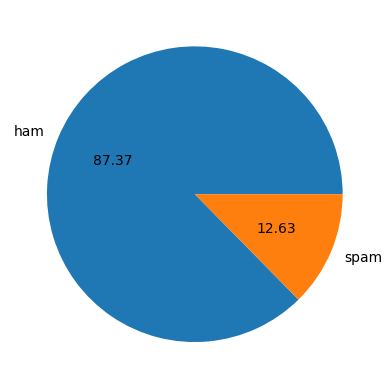

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [ ]:
# Data is imbalanced as there are large number of hams and very less spams

In [ ]:
#check for number of alphabets, words and sentences in dataset

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# add three columns 1- number of characters 2 - number of words 3 - number of sentences

In [ ]:
df['num_characters'] = df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df ['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df ['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#ham
df[df['target'] == 0][['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#spam
df[df['target'] == 1][['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

In [ ]:
#comparing ham and spam messages
#spam has more words than ham

<Axes: xlabel='num_characters', ylabel='Count'>

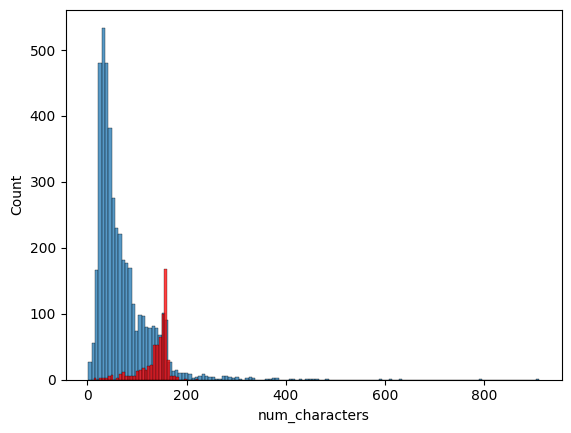

In [ ]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

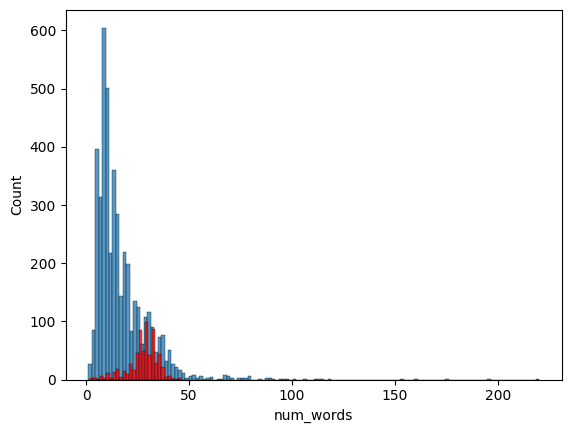

In [ ]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

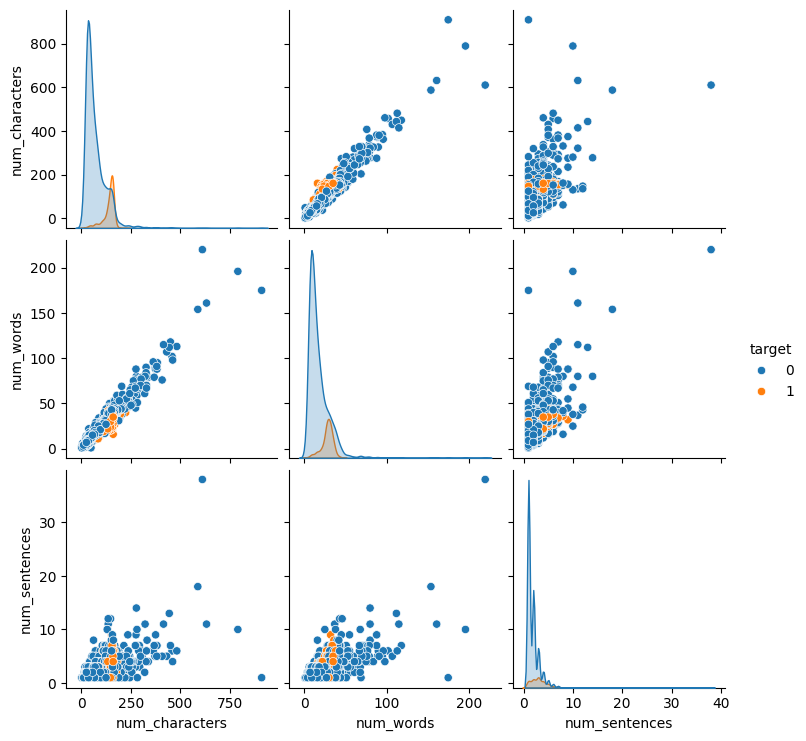

In [ ]:
sns.pairplot(df, hue = 'target')

<ipython-input-87-7a6cbdc328db>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

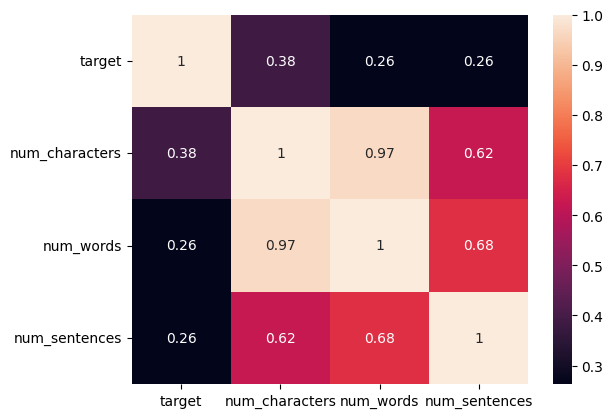

In [ ]:
#finding correlation
sns.heatmap(df.corr(), annot = True)

# 3. Data Preprocessing



*   Lower Case
*   Tokenization


*   Removing Special Characters



*   Removing stop words and Punctuations

*  Stemming








In [ ]:
#we will do data preprocessing using a single function transform_text

def transform_text(text):
  text = text.lower()                             #step 1 lowercase
  text = nltk.word_tokenize(text)                 #tokenization
  y = []
  for i in text:                                  #remove special characters
    if i.isalnum():
      y.append(i)

  text = y[:]                                     #Removing stop words and Punctuations
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]                                       #stemming
  y.clear()

  for i in text:
    y.append(ps.stem(i))


  return " ".join(y)

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string

In [ ]:
transform_text('I like to tell you that I am Machine Learning?')

'like tell machin learn'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [ ]:
#added transformed text column in dataset
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
#build word cloud of hams and spams which contain important words of both type

In [ ]:
#world cloud for spams

from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

<Figure size 1500x600 with 0 Axes>

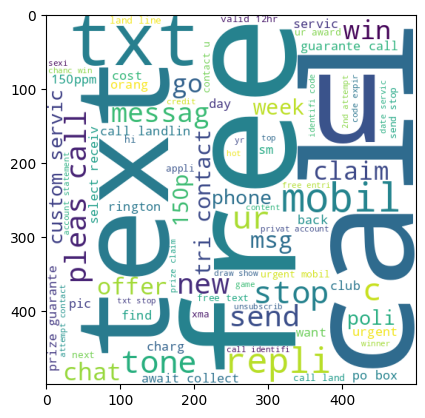

<Figure size 1500x600 with 0 Axes>

In [ ]:
plt.imshow(spam_wc)
plt.figure(figsize=(15,6))

In [ ]:
#ham messages
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

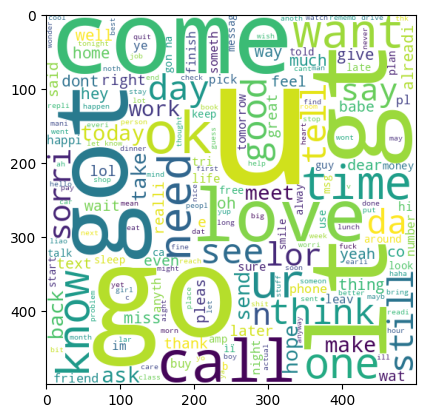

In [ ]:
plt.imshow(spam_wc)

In [ ]:
#top 30 words in spam messages
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

<Axes: ylabel='0'>

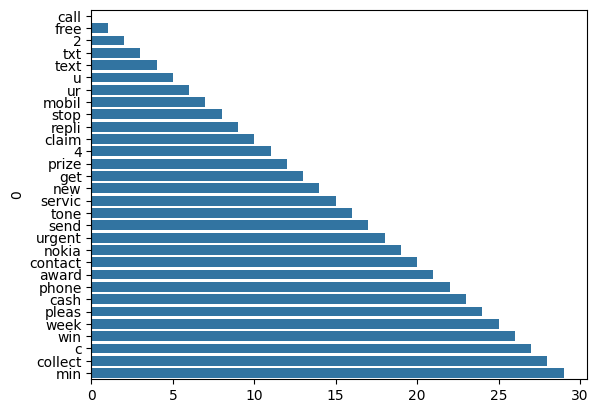

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])

In [ ]:
#top 30 words in ham messages
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

<Axes: ylabel='0'>

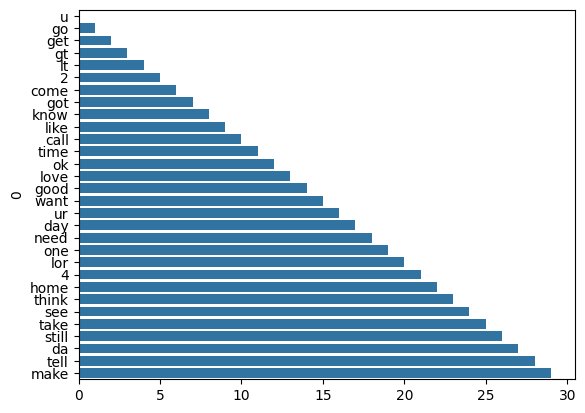

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])

# **Model Building**

In [ ]:
# Build a model using Naive Bayes Classifier.
# For that we need to convert transformed_text into numeric values.
# As ML algorithms work on numerical input and outputs.

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [ ]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
#We have choosen mnb with tfidf

In [ ]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))